<a href="https://colab.research.google.com/github/Hellrider777/Analysing-Lorenz-System/blob/main/OPhO_Experimental_2023_%2C_Team_Physics_Ninjas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ANALYZING **LORENZ SYSTEM** BY SIMULATION [THROUGH QUESTIONS GIVE BY OPHO 2023]

---



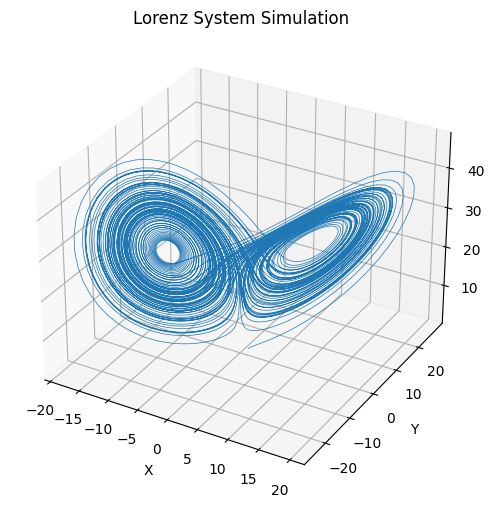

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
sigma = 10
rho = 28
beta = 8/3

wind_sp= np.array([0,100*dt,0])

# Lorenz system equations
def lorenz_system(state, t):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

# Fourth-order Runge-Kutta method
def rk4_step(state, t, dt, system):
    k1 = system(state, t)
    k2 = system(state + 0.5 * dt * k1, t + 0.5 * dt)
    k3 = system(state + 0.5 * dt * k2, t + 0.5 * dt)
    k4 = system(state + dt * k3, t + dt)
    new_state = state + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return new_state

# Second-order Runge-Kutta method
def rk2_step(state, t, dt, system):
    k1 = system(state, t)
    k2 = system(state + dt * k1, t + dt)
    new_state = state + dt * k2
    return new_state

# Distance between two state vectors
def get_distance(state1, state2):
    return np.linalg.norm(np.array(state2) - np.array(state1))

# Simulation parameters
dt = 0.01
t_max = 100
num_steps = int(t_max / dt)

# Initial state
initial_state = np.array([1.0, 1.0, 1.0])

# Arrays to store results
time_points = np.linspace(0, t_max, num_steps)
state_trajectory = np.zeros((num_steps, 3))

# Simulation loop
state = initial_state
for i in range(num_steps):
    state_trajectory[i] = state
    state = rk4_step(state, time_points[i], dt, lorenz_system)

# Plotting the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(state_trajectory[:, 0], state_trajectory[:, 1], state_trajectory[:, 2], lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz System Simulation')
plt.show()

You are given access to the following functions:

`system(state, t)`takes in $[x_0,x_1,x_2],t$ and outputs $[\dot{x}_0,\dot{x}_1,\dot{x}_2]$

`rk4_step(state, t, dt, system)` takes in $[x_0,x_1,x_2]$ at time $t$ and outputs the state at time $t+dt,$ when it is evolved through the inputed system.

`rk2_step(state, t, dt, system)` takes in $[x_0,x_1,x_2]$ at time $t$ and outputs the state at time $t+dt,$ when it is evolved through the inputed system.

`get_distance(state1, state2)` takes in two state vectors and returns the Cartesian distance between them.

# QUESTION 0: Prelims
What condition needs to be satisfied for $\sigma,\rho,\beta$ in order for the ODE to be stable? (i.e. bounded orbits). Where are the attractors located?

**For stability** we are going to put the value of all time derivatives to be zero. Thus getting three points of stability :

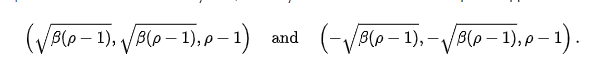
 and a trivial solution (0,0,0)

on further research on wikipedia, we found out that the relation among parameters comes out to be
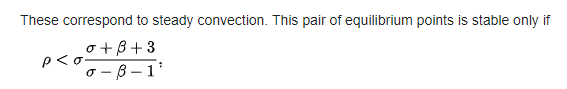



# QUESTION 1: Changing Parameters
Suppose you change the parameter $\rho$ slightly above its original value, and keep $\sigma$ and $\beta$ at their original values. How does the system behavior change? In particular, how does the position of the attractors change, and what happens to the system's stability?

Now suppose you keep $\rho$ at its original value, and change $\sigma$ and $\beta$ to values slightly different from their original ones. Again, describe the changes in the system behavior, the position of the attractors, and the system's stability.

We changed the parameters firstly rho and then sigma and beta.

 We observed that on changing values of rho, the position of attractors remains fixed whereas the stability of the orbits increases as they become less chaotic and more concentrated. The lines get thinner and condense into loops.


 On changing the values of Beta and Sigma, the position of attractors changes sharply. The change in graph is much more drastic and profound compared to changing rho. On slight changes the attractor circles change and reduce to a single attractor circle with thin lines around it but this time, it condenses into a spiral .

 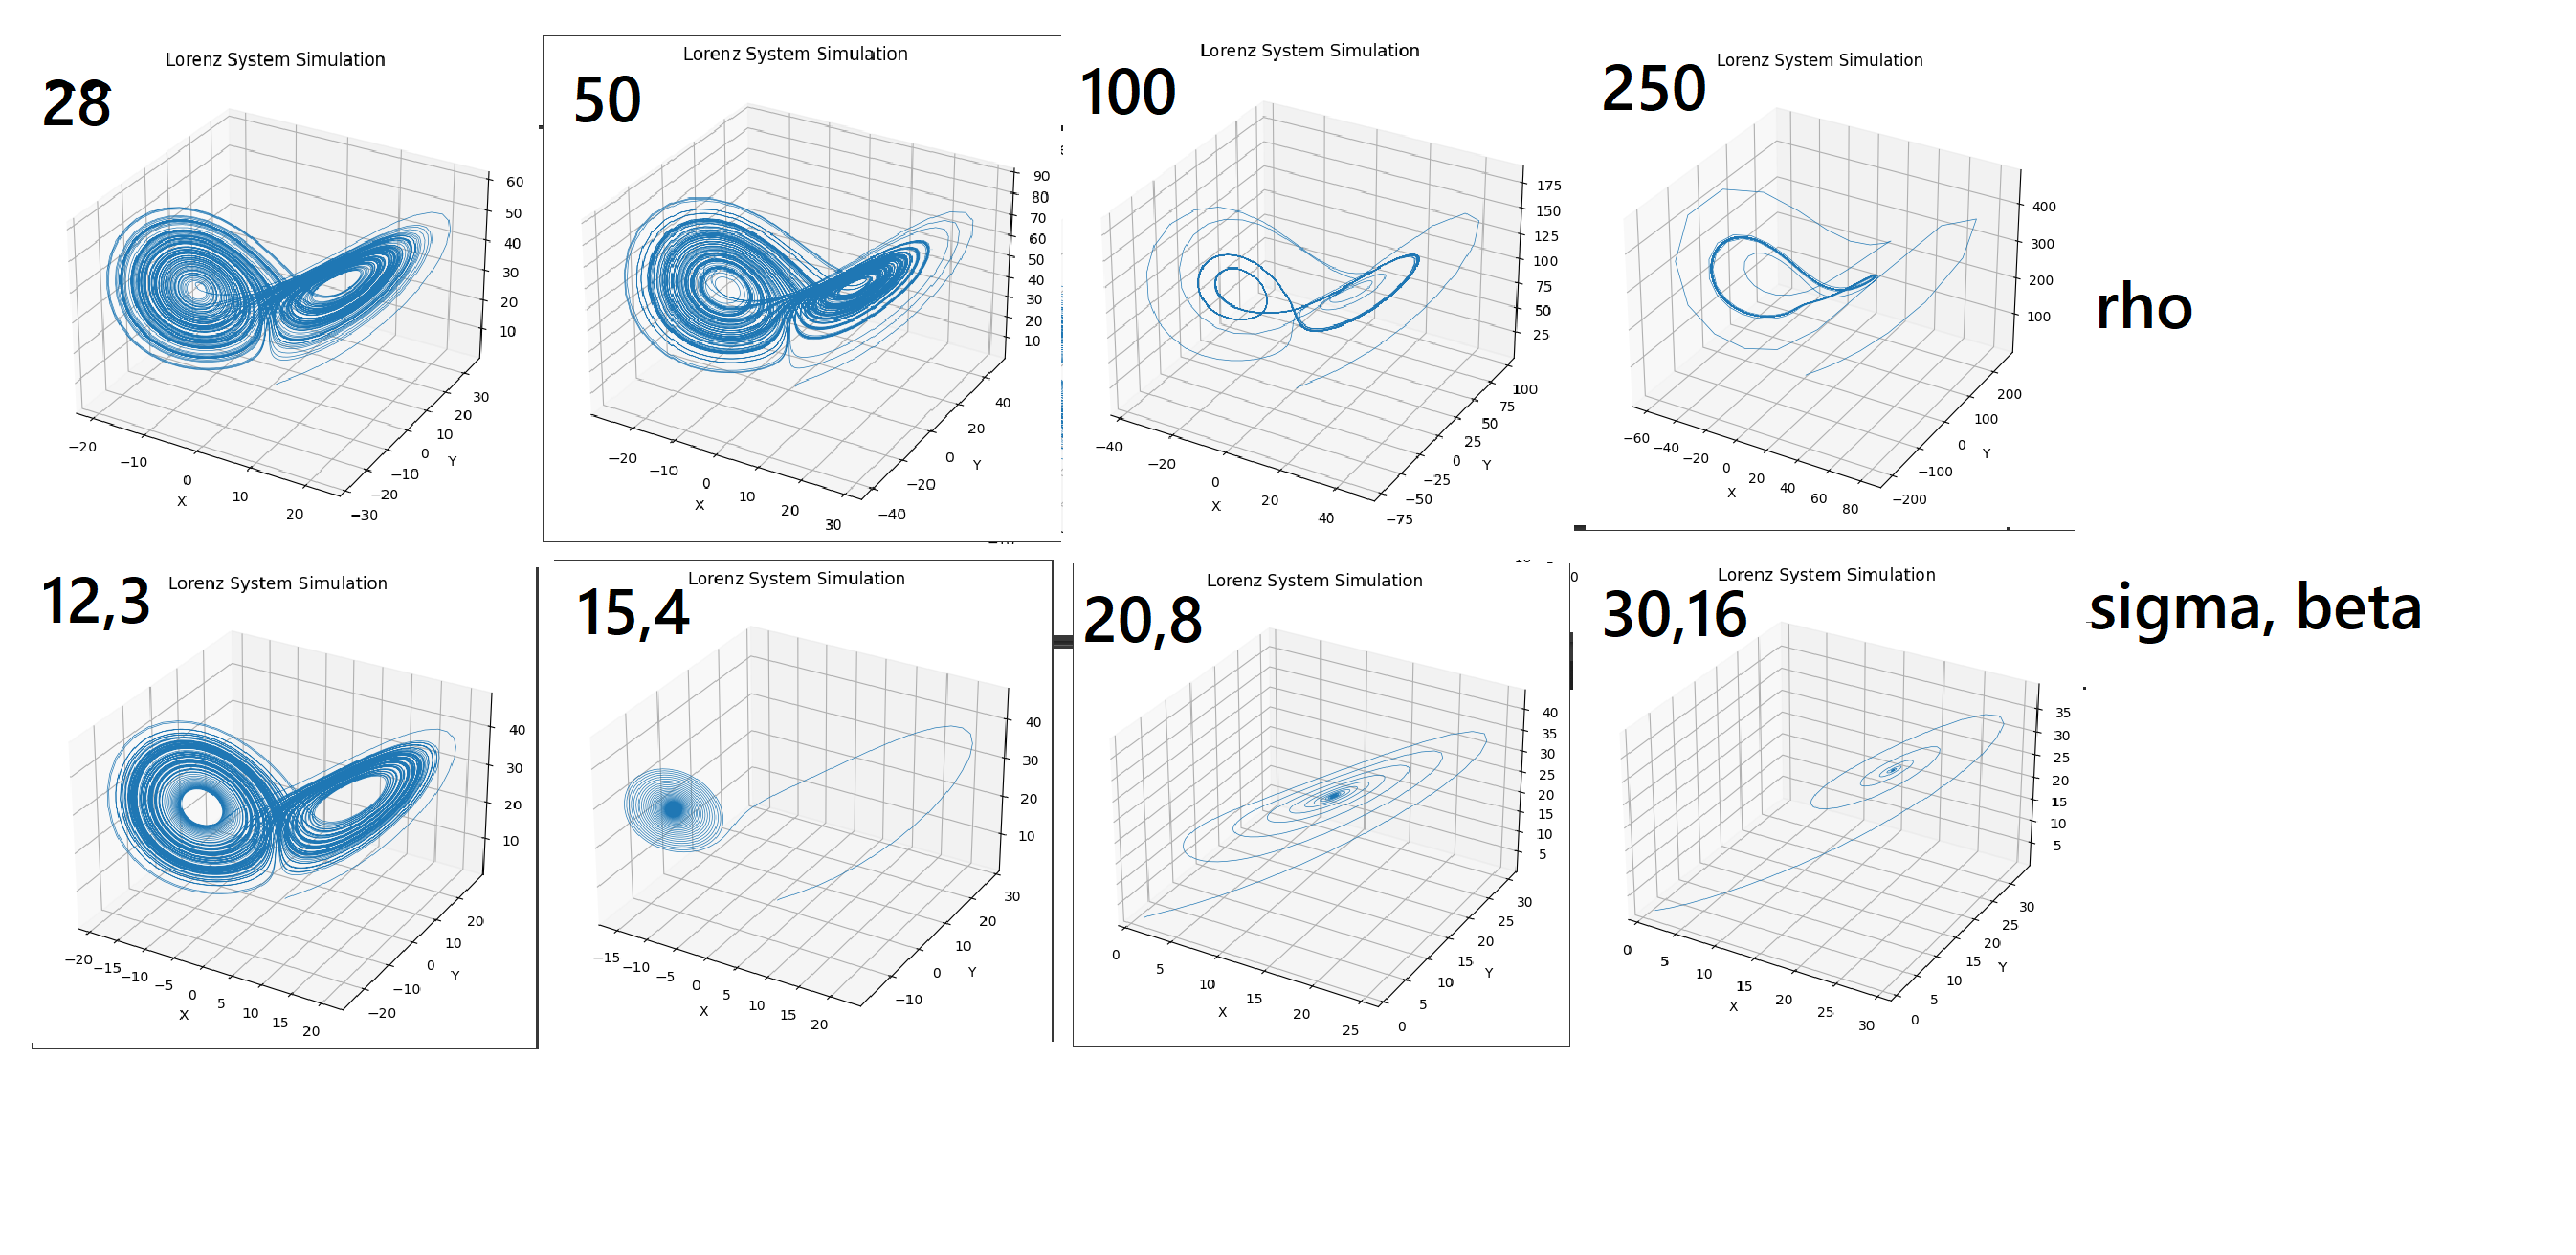


# QUESTION 2: Wind
Suppose a constant wind of magnitude $100\;\mathrm{m/s}$ moves through the system. Describe what happens to the system and the thickness of lines. Does the position of the center move, and where? Modify the code we gave to output a new plot.

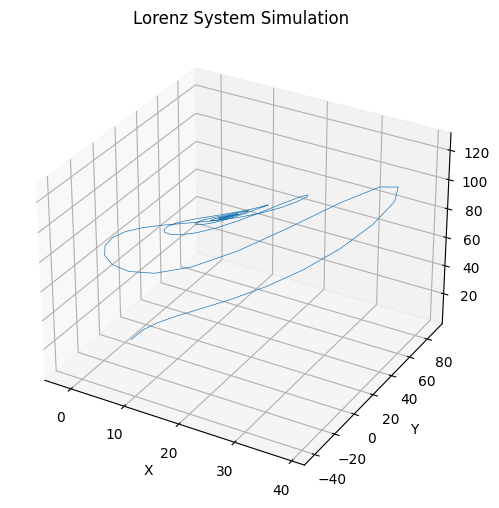

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
sigma = 10
rho = 28
beta = 8/3

wind_sp= np.array([0,100*dt,0])

# Lorenz system equations
def lorenz_system(state, t):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

# Fourth-order Runge-Kutta method
def rk4_step(state, t, dt, system):
    k1 = system(state, t)
    k2 = system(state + 0.5 * dt * k1, t + 0.5 * dt)
    k3 = system(state + 0.5 * dt * k2, t + 0.5 * dt)
    k4 = system(state + dt * k3, t + dt)
    new_state = state + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return new_state

# Second-order Runge-Kutta method
def rk2_step(state, t, dt, system):
    k1 = system(state, t)
    k2 = system(state + dt * k1, t + dt)
    new_state = state + dt * k2
    return new_state

# Distance between two state vectors
def get_distance(state1, state2):
    return np.linalg.norm(np.array(state2) - np.array(state1))

# Simulation parameters
dt = 0.01
t_max = 100
num_steps = int(t_max / dt)

# Initial state
initial_state = np.array([1.0, 1.0, 1.0])

# Arrays to store results
time_points = np.linspace(0, t_max, num_steps)
state_trajectory = np.zeros((num_steps, 3))

# Simulation loop
state = initial_state
for i in range(num_steps):
    state_trajectory[i] = state
    state = (rk4_step(state, time_points[i], dt, lorenz_system)+wind_sp)

# Plotting the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(state_trajectory[:, 0], state_trajectory[:, 1], state_trajectory[:, 2], lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz System Simulation')
plt.show()

On compiling wind with the current system, The thickness of the lines decreases to become a faint thin spiral around the attractor circle. The attractors reduce to a single one somewhere in between them. The system becomes less chaotic and spiral.

# QUESTION 3: Compute the Maximal Lyapunov Exponent (MLE)
For these parameters:

* $\sigma = 15.6$
* $\rho = 35.4$
* $\beta = 3.13$

See if you can estimate uncertainties!

In [ ]:
sigma = 15.6
rho = 35.6
beta = 3.13
t_max=10000
dt=0.01
num=int(t_max/dt)
t=0
y=np.array([1,1,1])
for i in range(num):
  y=rk4_step(y,t,dt,lorenz_system)
  t+dt

print(y)

sigma = 15.6*(0.9999)
rho = 35.6*(0.9999)
beta = 3.13*(0.9999)
t_max=10000
dt=0.01
num=int(t_max//dt)
t=0
y1=np.array([1,1,1])
for i in range(num):
  y1=rk4_step(y,t,dt,lorenz_system)
  t+dt

print(y1)

import math
t=(y-y1)
lc1= (math.log(abs((t[0])/(15.6*(10**-4)))))/(10**4)
lc2= (math.log(abs((t[1])/(35.6*(10**-4)))))/(10**4)
lc3= (math.log(abs((t[2])/(3.13*(10**-4)))))/(10**4)
print("The value of Maximal Lyapunov Exponent (MLE) is ",max(lc1,lc2,lc3))


[ 1.37648646 -1.77425877 34.26867332]
[ 0.9242478  -1.7357309  33.19301855]
The value of Maximal Lyapunov Exponent (MLE) is  0.0008142236931655322


Since the value of MLE is positive. This implies that the system is **diverging** and **unstable**

# QUESTION 4: Comparing RK4 to RK2
Call $T_\text{max}$ the maximal time for when a simulation is accurate to $1\%$ of reality. A simulation is characterized by the specific numerical solver and the time step $dt.$

Using RK4, estimate $T_\text{max}$ at various values of $d{t},$ given the initial point of $(0,0,0).$ Make a plot.

Then do the same thing with RK2. What differences do you notice?

In [ ]:
  # rk4
  sigma = 15.6
  rho = 35.6
  beta = 3.13
  t_max=10000
  num=int(t_max/dt)
  t=0
  dt=0.1              # dt can be changed to find different values of time T
  y=np.array([1,1,1])
  for i in range(num):
    y=rk4_step(y,t,dt,lorenz_system)
    t+dt

  print(y)

  sigma = 15.6*(0.9999)
  rho = 35.6*(0.9999)
  beta = 3.13*(0.9999)
  t_max=10000
  num=int(t_max//dt)
  t=0
  dt=0.1          # dt can be changed to find different values of time T
  y1=np.array([1,1,1])
  for i in range(num):
    y1=rk4_step(y,t,dt,lorenz_system)
    t+dt

  print(y1)

  import math
  t=(y-y1)
  lc1= (math.log(abs((t[0])/(15.6*(10**-4)))))/(10**4)
  lc2= (math.log(abs((t[1])/(35.6*(10**-4)))))/(10**4)
  lc3= (math.log(abs((t[2])/(3.13*(10**-4)))))/(10**4)

  LC= (max(lc1,lc2,lc3))
  T = (math.log(1.01))/LC
  print(T)



In [ ]:
  # rk2

  def rk2_step(state, t, dt, system):
    k1 = system(state, t)
    k2 = system(state + dt * k1, t + dt)
    new_state = state + dt * k2
    return new_state


  sigma = 15.6
  rho = 35.6
  beta = 3.13
  t_max=10000
  num=int(t_max/dt)
  t=0
  dt=0.003                                  # dt can be changed to find different values of time T
  y=np.array([1,1,1])
  for i in range(num):
    y=rk2_step(y,t,dt,lorenz_system)
    t+dt

  print(y)

  sigma = 15.6*(0.9999)
  rho = 35.6*(0.9999)
  beta = 3.13*(0.9999)
  t_max=10000
  num=int(t_max//dt)
  t=0
  dt=0.003                                   # dt can be changed to find different values of time T
  y1=np.array([1,1,1])
  for i in range(num):
    y1=rk2_step(y,t,dt,lorenz_system)
    t+dt

  print(y1)

  import math
  t=(y-y1)
  lc1= (math.log(abs((t[0])/(15.6*(10**-4)))))/(10**4)
  lc2= (math.log(abs((t[1])/(35.6*(10**-4)))))/(10**4)
  lc3= (math.log(abs((t[2])/(3.13*(10**-4)))))/(10**4)

  LC= (max(lc1,lc2,lc3))
  T = (math.log(1.01))/LC
  print(T)



[-10.4066325 -10.4066325  34.6      ]
[-10.4066273  -10.40652068  34.60002871]
-19278.162481550993


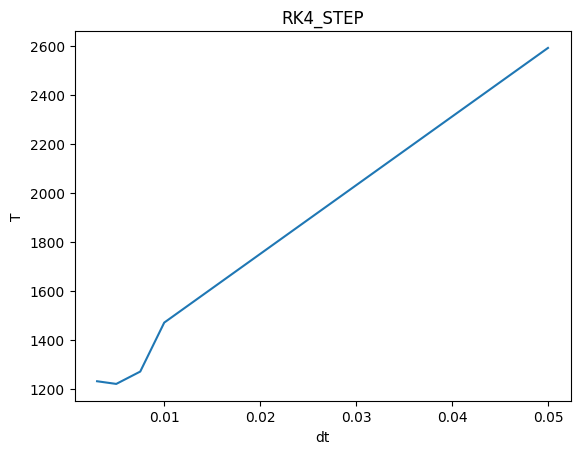

In [ ]:
import matplotlib.pyplot as plt

dt# x axis values
x = [0.003,0.005,0.0075,0.01,0.05]
# corresponding y axis values

y = [1230.823,1219.907,1270.369,1470.251025,2591.559]


# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('dt')
# naming the y axis
plt.ylabel('T')

# giving a title to my graph
plt.title('RK4_STEP')

# function to show the plot
plt.show()

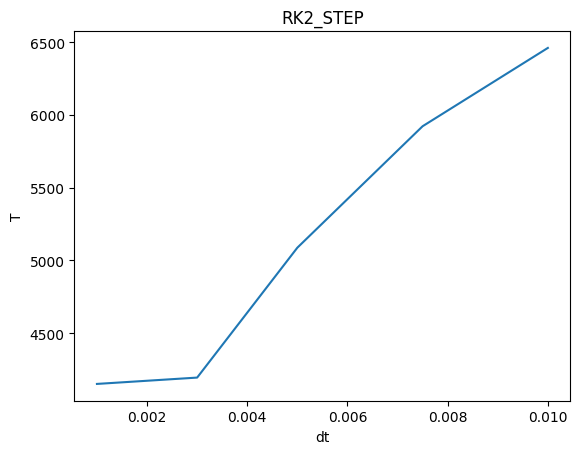

In [ ]:
import matplotlib.pyplot as plt

dt# x axis values
x = [0.001,0.003,0.005,0.0075,0.01]
# corresponding y axis values
y = [4151.723, 4195.264, 5087.910, 5922.42, 6460.617]

# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('dt')
# naming the y axis
plt.ylabel('T')

# giving a title to my graph
plt.title('RK2_STEP')

# function to show the plot
plt.show()

We observe that the observation of RK2 fluctuate more than RK4 over time. Thus RK4_STEP is a more accurate measure for the given system.

# QUESTION 5: Orbital Frequency

Let $\sigma = 10, \rho=28, \beta=8/3.$ What is the average angular frequency $\omega_0?$ Report with uncertainty. How does this change with position?

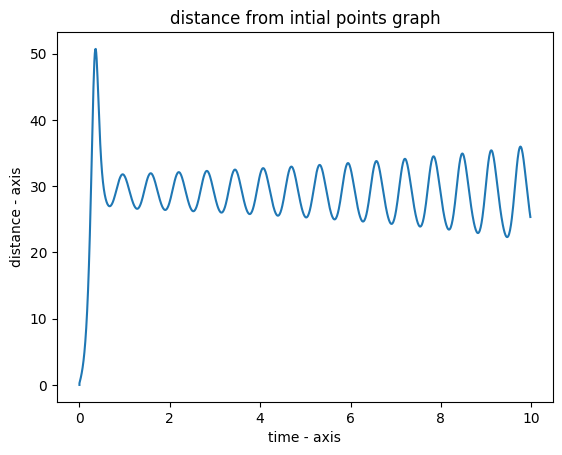

In [ ]:
sigma = 10
rho = 28
beta = 8/3

t=0
dis=[]
dt=0.01
state_point = np.zeros((1000, 2))
initial_state = np.array([0,0])
state1 = initial_state
state=np.array([1,1,1])
for i in range(1000):
    time_points = np.linspace(0, 10, 1000)
    state=rk4_step(state, time_points[i], dt, lorenz_system)
    d=get_distance([1,1,1],state)
    state_point[i] = state1
    state1 = np.array([d,t])
    t=t+dt



import matplotlib.pyplot as plt

dt# x axis values
x = state_point[:, 1]
# corresponding y axis values
y = state_point[:, 0]

# plotting the points
plt.plot(x, y)

# naming the x axis
plt.xlabel('time - axis')
# naming the y axis
plt.ylabel('distance - axis')

# giving a title to my graph
plt.title('distance from intial points graph')

# function to show the plot
plt.show()

The approximate trajectory of the motion is as shown. It goes from the given ellipse-shaped lobe to the other one where it goes on sevolving again and again, as is evident from the graph as shown. It periodically comes close to the object at the approximate intersection point of the two lobes. We are required to calculate the average angular velocity as the object revolves in the second lobe. The approximate time period of a revolution can be easily found out from the time difference between two successive minimas.

i.e.         T ≈ 0.6 seconds

so avg angular speed = 2π/T ≈ 10.47 rad/s.





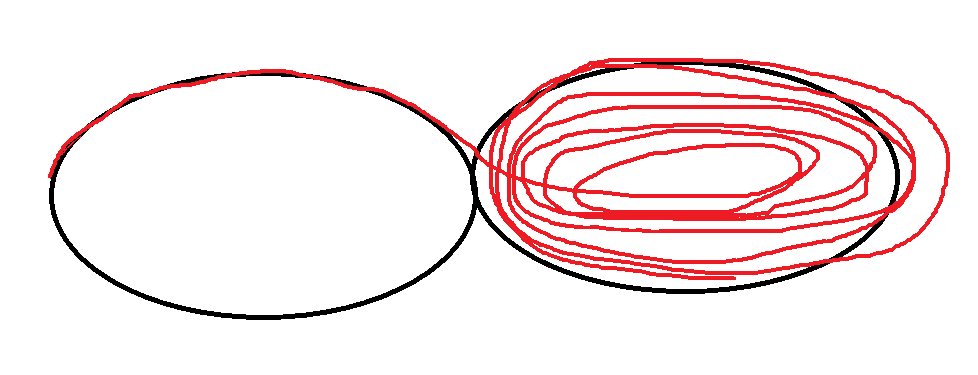